## SKFlow Simple Linear Regression on Parkinson's Disease Telemonitoring Dataset

https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring

In [3]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
import tensorflow.contrib.learn.python.learn as skflow
from sklearn import datasets, metrics
import numpy as np
import matplotlib.pyplot as pp
import os.path
import pickle

In [9]:
### show label distribution
def plot_labelDistribution(df,col):
    te = df[col].sort_values().unique()
    val = 0. # this is the value where you want the data to appear on the y-axis.
    ar = np.arange(len(te)) # just as an example array
    pp.plot(te, np.zeros_like(ar) + val, 'x')
    pp.show()
    
### Converting Data into Tensors
def convert_dataframe(dataframe, colnames, labelcol):
    X = np.array(dataframe[colnames].iloc[:,]).astype(np.float32)
    Y = np.array(dataframe[labelcol].iloc[:,]).astype(np.float32)  
    return X, Y

### load or generate random ids for test and training sets
def slice_ids(length,run_id):
    idfile = "models/"+run_id+"_ids"
    if os.path.isfile(idfile): 
        ### Re-run model
        with open(idfile, 'rb') as fp:
            randomInd = pickle.load(fp)
    else:
        ### First run
        randomInd = np.random.permutation(length)
        with open(idfile, 'wb') as fp:
            pickle.dump(randomInd, fp)
    
    ###  70% of ids randomly selected for training
    ###  30% of ids randomly selected for testing
    mid = int(.7*length)
    trainidx = randomInd[:mid]
    testidx = randomInd[mid:]
    return trainidx, testidx

def run_LinearRegressor(run_id, steps = 100):
    ### Get Training and Testing indexes
    trainidx, testidx = slice_ids(len(X),run_id)

    ### Define classifier - Simple Linear Regression
    ### model_dir - this is where the model is saved. To re-run use the same runIdentifier
    feature_columns = skflow.infer_real_valued_columns_from_input(X)
    model = skflow.LinearRegressor(
        feature_columns=feature_columns,
        model_dir="models/SLR/"+run_id,
        enable_centered_bias=False)
    
    model.fit(X[trainidx,:], 
              Y[trainidx],#.astype(np.int), 
              steps=steps)
    
    y_p = model.predict(X[testidx,:])
    y_t = Y[testidx]
    return np.linalg.norm(y_t-y_p)/y_t.shape[0]

### Load data and convert to tensors

In [10]:
### Load datafile into dataframe
datafile = "data/data.txt"
df_data = pd.read_csv(datafile)

### Create list of column names for feature data.
featcol = list(df_data.columns.values)
featcol.remove("subject#")
featcol.remove("total_UPDRS")
featcol.remove("motor_UPDRS")

### First Model fitting Motor_UPDRS - SLR

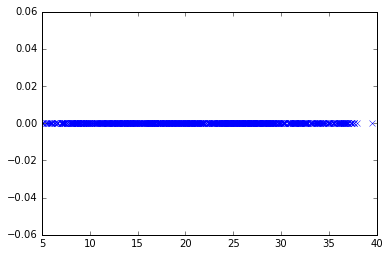

In [20]:
labelcol = "motor_UPDRS" 
X, Y = convert_dataframe(df_data, featcol, labelcol)
plot_labelDistribution(df_data,labelcol)

In [19]:
%%time
print run_LinearRegressor("Motor_UPDRS_001", 10000)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


0.182365984384
CPU times: user 1min 39s, sys: 3.93 s, total: 1min 43s
Wall time: 1min 37s


In [15]:
%%time
print run_LinearRegressor("Motor_UPDRS_002", 10000)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


0.180686357815
CPU times: user 1min 37s, sys: 3.67 s, total: 1min 40s
Wall time: 1min 35s


In [16]:
%%time
print run_LinearRegressor("Motor_UPDRS_003", 10000)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


0.185052846821
CPU times: user 1min 34s, sys: 3.11 s, total: 1min 37s
Wall time: 1min 32s


In [17]:
%%time
print run_LinearRegressor("Motor_UPDRS_004", 10000)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


0.187049246889
CPU times: user 1min 31s, sys: 3.22 s, total: 1min 35s
Wall time: 1min 29s


### Second Model fitting Total_UPDRS - SLR

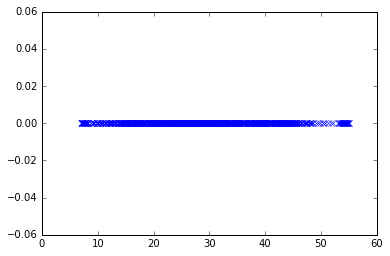

In [21]:
labelcol = "total_UPDRS"
X, Y = convert_dataframe(df_data, featcol, labelcol)
plot_labelDistribution(df_data,labelcol)

In [19]:
%%time
print run_LinearRegressor("Total_UPDRS_001", 10000)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


0.23748223645
CPU times: user 1min 32s, sys: 3.37 s, total: 1min 36s
Wall time: 1min 30s


In [20]:
%%time
print run_LinearRegressor("Total_UPDRS_002", 10000)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


0.237613913828
CPU times: user 1min 31s, sys: 3.19 s, total: 1min 34s
Wall time: 1min 28s


In [21]:
%%time
print run_LinearRegressor("Total_UPDRS_003", 10000)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


0.237118154646
CPU times: user 1min 36s, sys: 3.75 s, total: 1min 40s
Wall time: 1min 34s


In [22]:
%%time
print run_LinearRegressor("Total_UPDRS_004", 10000)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


0.240930636228
CPU times: user 1min 35s, sys: 3.69 s, total: 1min 39s
Wall time: 1min 33s
